In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

warnings.filterwarnings('ignore')

In [38]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [39]:
# Define the features and the outcome
# make sure data are evenly divided
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2 
df = heartdisease_df.iloc[:rows, :]

X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)


scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [40]:
X_std

array([[ 0.94635153,  0.68787407, -2.24870372, ...,  2.27118179,
        -0.71290492,  0.65599698],
       [ 1.39134672,  0.68787407,  0.87602875, ...,  0.64583368,
         2.50048742, -0.86793447],
       [ 1.39134672,  0.68787407,  0.87602875, ...,  0.64583368,
         1.42935664,  1.16397414],
       ...,
       [ 1.50259552,  0.68787407,  0.87602875, ...,  0.64583368,
         1.42935664,  1.16397414],
       [ 0.27885874,  0.68787407,  0.87602875, ...,  0.64583368,
         0.35822586,  1.16397414],
       [ 0.27885874, -1.45375447, -1.20712623, ...,  0.64583368,
         0.35822586, -0.86793447]])

In [41]:
dbscan_cluster =DBSCAN(eps=3, min_samples=5,metric='euclidean')
clusters=dbscan_cluster.fit_predict(X_std)

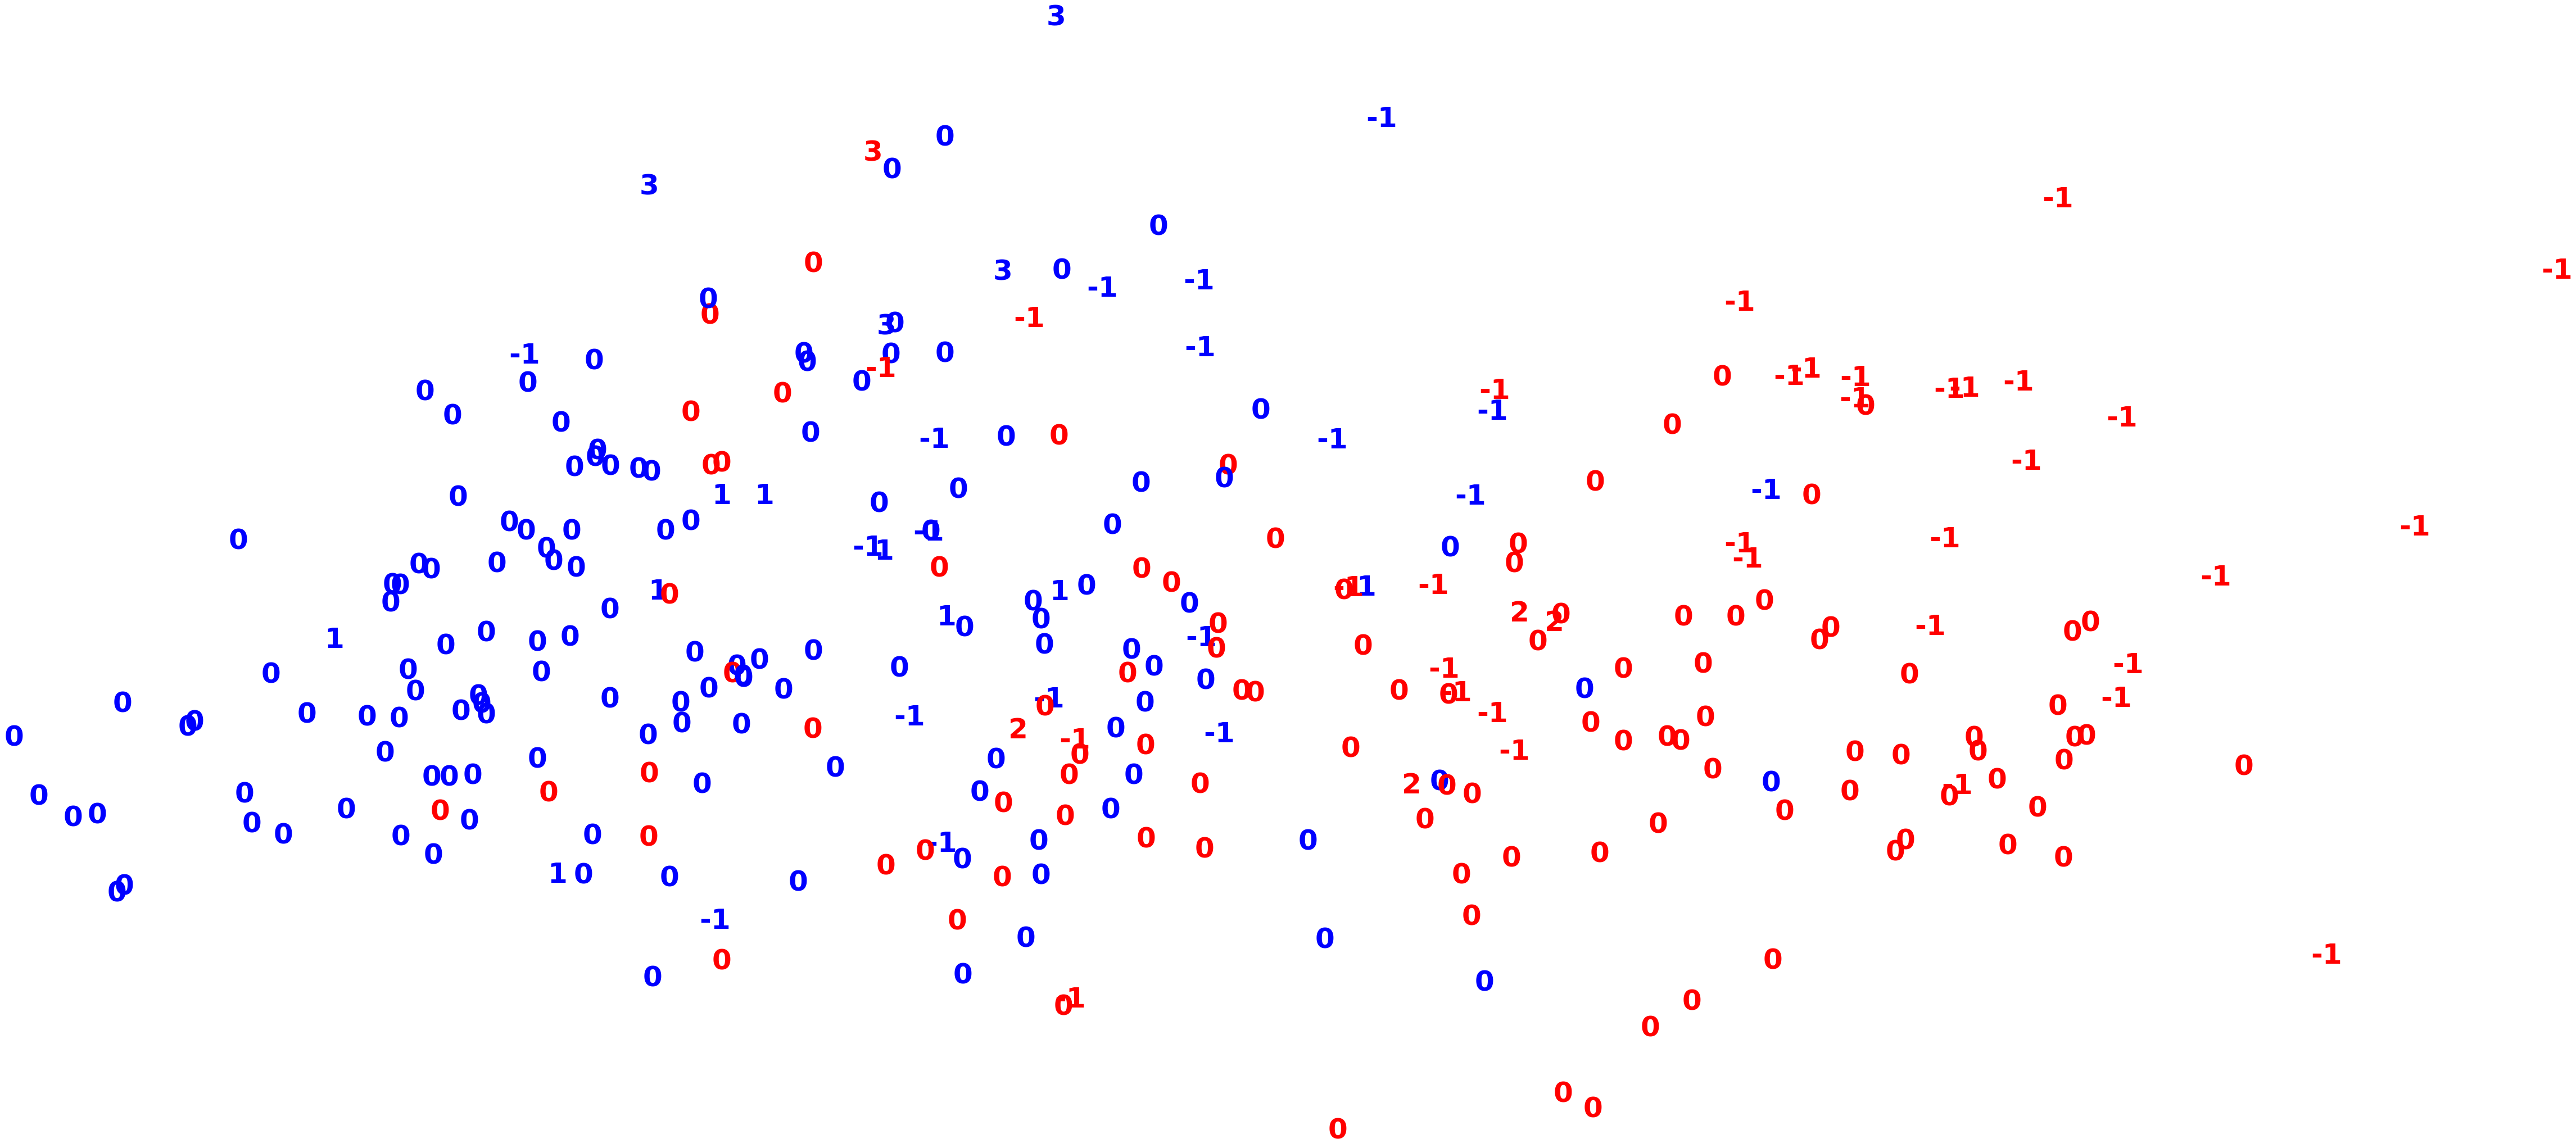

In [42]:
# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [43]:
print(metrics.adjusted_rand_score(y,clusters))

0.018034251396176454


In [44]:
print(metrics.silhouette_score(X_std,clusters,metric='euclidean'))

0.012046186337267019


In [51]:
# set eps=1, min_sample=1, metric="euclidean" then increase min_samples
dbscan_cluster=DBSCAN(eps=1,min_samples=1, metric="euclidean")
clusters=dbscan_cluster.fit_predict(X_std)

print('number of clusters when min_sample=1 {}'.format(len(np.unique(clusters))))


for i in range(2,41):
    dbscan_cluster=DBSCAN(eps=1,min_samples=i,metric="euclidean")
    clusters=dbscan_cluster.fit_predict(X_std)
    print("{} clusters when min_samples={}".format(len(np.unique(clusters)),i))




number of clusters when min_sample=1 293
9 clusters when min_samples=2
2 clusters when min_samples=3
1 clusters when min_samples=4
1 clusters when min_samples=5
1 clusters when min_samples=6
1 clusters when min_samples=7
1 clusters when min_samples=8
1 clusters when min_samples=9
1 clusters when min_samples=10
1 clusters when min_samples=11
1 clusters when min_samples=12
1 clusters when min_samples=13
1 clusters when min_samples=14
1 clusters when min_samples=15
1 clusters when min_samples=16
1 clusters when min_samples=17
1 clusters when min_samples=18
1 clusters when min_samples=19
1 clusters when min_samples=20
1 clusters when min_samples=21
1 clusters when min_samples=22
1 clusters when min_samples=23
1 clusters when min_samples=24
1 clusters when min_samples=25
1 clusters when min_samples=26
1 clusters when min_samples=27
1 clusters when min_samples=28
1 clusters when min_samples=29
1 clusters when min_samples=30
1 clusters when min_samples=31
1 clusters when min_samples=32
1 clus

In [52]:
# set min_samples=1, increase eps

dbscan_cluster=DBSCAN(eps=1,min_samples=1, metric="euclidean")
clusters=dbscan_cluster.fit_predict(X_std)

print('number of clusters when min_sample=1 {}'.format(len(np.unique(clusters))))


for j in range(2,41):
    dbscan_cluster=DBSCAN(eps=j,min_samples=1,metric="euclidean")
    clusters=dbscan_cluster.fit_predict(X_std)
    print("{} clusters when eps={}".format(len(np.unique(clusters)),j))



number of clusters when min_sample=1 293
178 clusters when eps=2
35 clusters when eps=3
3 clusters when eps=4
1 clusters when eps=5
1 clusters when eps=6
1 clusters when eps=7
1 clusters when eps=8
1 clusters when eps=9
1 clusters when eps=10
1 clusters when eps=11
1 clusters when eps=12
1 clusters when eps=13
1 clusters when eps=14
1 clusters when eps=15
1 clusters when eps=16
1 clusters when eps=17
1 clusters when eps=18
1 clusters when eps=19
1 clusters when eps=20
1 clusters when eps=21
1 clusters when eps=22
1 clusters when eps=23
1 clusters when eps=24
1 clusters when eps=25
1 clusters when eps=26
1 clusters when eps=27
1 clusters when eps=28
1 clusters when eps=29
1 clusters when eps=30
1 clusters when eps=31
1 clusters when eps=32
1 clusters when eps=33
1 clusters when eps=34
1 clusters when eps=35
1 clusters when eps=36
1 clusters when eps=37
1 clusters when eps=38
1 clusters when eps=39
1 clusters when eps=40


In [ ]:
# question about the result??
# what does the two results mean?

In [46]:
#len(np.unique(clusters))